<a href="https://colab.research.google.com/github/amyfthau/CFGSum23D1G4/blob/data_collection/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

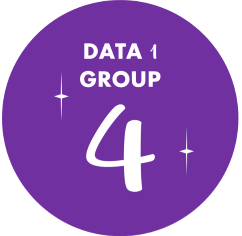

Hey guys! Just playing around to see how we will collab and code - Amy :)

Feel free to add to this - I want to see how it does version control with GitHub

**Import Data from Google Drive**

In [ ]:
# 1) Set files ready

# Import relevant libraries to mount drive
from google.colab import drive
import os

# Mount google drive
drive.mount('/content/drive')

# Define the path to your specific folder
specific_folder_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4'

# Navigate to the specific folder
os.chdir(specific_folder_path)

# change directory to shared group folder
%cd /content/drive/MyDrive/CFGdegree_Sum23_D1_G4




Mounted at /content/drive
/content


In [ ]:
# 2) Import relevant libraries

import pandas as pd
import requests

## Functions

In [ ]:
# Functions

def remove_spaces (df, column_wise):
  """
  Function for removing whitespaces from string columns in a pandas DataFrame.

  #if we want to do it column-wise and not for the whole dataset remove the first line of the function and place column name in.

  Args:
    df (pandas.DataFrame): The input DataFrame.
    column_wise (bool): Whether to remove whitespaces column-wise (default is True).
    columns (list or None): List of columns to process. If None, all string columns are processed.

  Returns:
    pandas.DataFrame: The DataFrame with whitespaces removed.

  Note:
    If column_wise is False, provide the 'columns' parameter to specify columns to process.


  """
  if column_wise:
    # Iterate through each column in the DataFrame
    for col in df.columns:
      # Check if the column contains string data
      if df[col].dtype == 'object':
        # Remove leading and trailing whitespaces from string values in the column
        df[col] = df[col].str.strip()
  else:
    # If not processing column-wise, use specified columns or default to all string columns
    if columns is None:
      columns = [col for col in df.columns if df[col].dtype == 'object']
      # Iterate through specified columns
      for col in columns:
      # Remove leading and trailing whitespaces from string values in the specified column
        df[col] = df[col].str.strip()
  # Return the DataFrame with whitespaces now removed
  return df

# when you've all looked through and are happy with the cleaned data here is a function for exporting the cleaned data into a new CSV to make it easier for use in other files:
#this will go into the same directory as this file - is this okay??

def save_clean_data(file_name, df):
  """
  Function for saving a cleaned DataFrame to a CSV file

  Args:
    file_name(str): The base name of the CSV file.
    df(pd.DataFrame): The DataFrame to save.

  """
  # Construct the output file name by appending 'cleaned.csv' to the provided file_name
  # and then save the DataFrame to the specified output file in CSV format
  df.to_csv('{}cleaned.csv'.format(file_name),index = False)


def check_unique_values(column_name, df):
    """
    Returns an array of unique values in a specified column of the DataFrame.

    Args:
        column_name (str): The name of the column to check for unique values.
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        numpy.ndarray: An array containing the unique values in the specified column.
    """
    # Use the unique() function to obtain an array of unique values in the specified column
    unique_values = df[column_name].unique()
    return unique_values


def value_count_series(column_name, df):
    """
    Creates a Pandas Series object containing value counts for each unique value in the specified column.

    Args:
        column_name (str): The name of the column for which to calculate value counts.
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        pandas.Series: A Series object with indices representing unique values and values representing their counts.
    """
    # Use the value_counts() function to count occurrences of each unique value in the specified column
    value_counts = df[column_name].value_counts()
    return value_counts

def clean_missing_data(df, column_names):
    """
    Removes rows with missing data from the DataFrame for specified columns.

    Args:
        df (pandas.DataFrame): The DataFrame to clean.
        column_names (str or list): The name(s) of the column(s) to consider for missing data removal.

    Returns:
        pandas.DataFrame: A new DataFrame with rows containing missing data in the specified columns removed.
    """
    # If column_names is a string, convert it to a list to handle single column case
    if isinstance(column_names, str):
        column_names = [column_names]

    # Drop rows with missing data in the specified columns
    df_cleaned = df.dropna(subset=column_names)

    return df_cleaned




def count_duplicates_drop(df):
  duplicates = df[df.duplicated()].shape[0]
  print('Duplicates Number: ',duplicates)
  df.drop_duplicates(inplace = True)
  print('Still any duplicates?: ',duplicates)


# # To add:
# 1. Handling duplicates /
# 2. Handling outliers
# 3. Data transformations - replace, apply, map
# 4. Handling categorical data
# 5. Data imptuation
# 6. String operations
# 7. Reshaping data
# 8.  DateTime handling
# 9. date type conversion
# 10. type conversion



In [ ]:
# @title Data Selection
# checking Anna's code -


# Define the range of rows to import (using header and skiprows)
header_row = 3  # The row that contains the column headers
skip_rows = 1   # The number of rows to skip after the header

header_row2 = 3  # The row that contains the column headers

# Specify the range of rows you want to keep
end_row = 13
end_row2 = 117

# Define the column range to import (skip the first blank column)
use_columns = "B:H"  # Specify the range of columns you want to import
use_columns2 = "A:AA"

# Create paths
householdwealthpath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Household_Wealth_by_Ethnicity_GBR.xlsx'
Housingaffordabilitypath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Housing_Purchase_Affordability_Tables2022.xlsx'
HomeOwnershippath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/home-ownership-spreadsheet.csv'
UKHPI2022path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/UK-HPI-full-file-2022-01.csv'
PricePaidRecordspath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/price_paid_records.csv'
# Read and convert into a dataframe object
WealthByEthnicity_df = pd.read_excel(householdwealthpath, sheet_name='Table 1', header=header_row, skiprows=skip_rows, usecols=use_columns)
HousingAffordability_df = pd.read_excel(Housingaffordabilitypath, sheet_name='1', header=header_row2, usecols=use_columns2)
HomeOwnership_df = pd.read_csv(HomeOwnershippath, encoding = 'unicode_escape')
UKHPI2022_df = pd.read_csv(UKHPI2022path)
PricePaidRecords_df = pd.read_csv(PricePaidRecordspath)
# Select the specified range of rows
WealthByEthnicity_df = WealthByEthnicity_df.iloc[0:end_row]
HousingAffordability_df = HousingAffordability_df.iloc[0:end_row2]
# Check data
print(WealthByEthnicity_df.describe())
print(HousingAffordability_df.describe())
print(HomeOwnership_df.describe())
print(UKHPI2022_df.describe())
print(PricePaidRecords_df.describe())
#HousingAffordability2022 = pd.DataFrame(pd.read_excel('/CFGdegree_Sum23_D1_G4/Data_Collection/Housing_Purchase_Affordability_Tables2022.xlsx')
#HomeOwnership = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/home-ownership-spreadsheet.csv'))
#UKHPI2022 = pd.DataFrame(pd.read_csv("UK-HPI-full-file-2022-01.csv"))
#EHSHeadline2022 = pd.DataFrame(pd.read_excel("2021-22_EHS_Headline_Report_Section_1_Households_Figures.xlsx"))
#PricePaidRecords = pd.DataFrame(pd.read_csv("price_paid_records.csv"))

            Mean (£)  25th percentile (£)  50th percentile (£)  \
count      12.000000            12.000000            12.000000   
mean   373308.333333         44233.333333        158433.333333   
std    158714.342929         45807.112059        107891.345456   
min    141100.000000          6800.000000         34300.000000   
25%    286650.000000         11150.000000         74375.000000   
50%    373500.000000         27050.000000        140000.000000   
75%    428250.000000         56375.000000        245725.000000   
max    665400.000000        152900.000000        313900.000000   

       75th percentile (£)  Unweighted Frequency  Weighted Frequency  
count            12.000000             12.000000        1.200000e+01  
mean         460316.666667           1501.750000        2.158750e+06  
std          193357.515468           4471.931109        6.014353e+06  
min          140300.000000             37.000000        8.100000e+04  
25%          339175.000000             89.750000  

used .describe to check for outliers in numerical values (these are very large numbers so it's printed out with the exponent (e+....))
- none in wealth by ethnicity
- check values between 192000-520000 in average price for HousingAffordability_df to see any outliers (though i don't think any ouliers should be cast off as house prices really do differ that much!)
-tbh a bit confused by the index columns so I would delete these.

- everything else in all datasets looks good numerical data outliers-wise.


- Although the datasets are clean anyway I'm now going through with.info to check the datatypes to see if any which we need as floats or numbers are strings etc, to know if we need to remove whitespace etc.

In [ ]:
print(WealthByEthnicity_df.head(10))
#checking for nul values
WealthByEthnicity_df.isnull().sum()
WealthByEthnicity_df.info()

                                       HRP Ethnicity  Mean (£)  \
0  Total household wealth including private pensi...       NaN   
1                                      White British  590400.0   
2                                        Other White  406400.0   
3                                     Mixed/Multiple  397500.0   
4                                             Indian  493800.0   
5                                          Pakistani  302100.0   
6                                        Bangladeshi  141100.0   
7                             Other Asian background  367800.0   
8                                    Black Caribbean  379200.0   
9                                      Black African  147300.0   

   25th percentile (£)  50th percentile (£)  75th percentile (£)  \
0                  NaN                  NaN                  NaN   
1              85100.0             313900.0             747500.0   
2              23800.0             118000.0             526900.0   
3

This looks all good- will now quickly check for duplicates:

In [ ]:
def count_duplicates_drop(df):
  duplicates = df[df.duplicated()].shape[0]
  print('Duplicates Number: ',duplicates)
  df.drop_duplicates(inplace = True)
  print('Still any duplicates?: ',duplicates)


count_duplicates_drop(WealthByEthnicity_df)

Duplicates Number:  0
Still any duplicates?:  0


In [ ]:
print(HousingAffordability_df.head(10))
#checking for nul values
HousingAffordability_df.isnull().sum()
HousingAffordability_df.info()

  Country/Region code Country/Region name House price decile    1999    2000  \
0           E92000001             England    10th percentile   33000   35500   
1           E92000001             England    20th percentile   42105   46229   
2           E92000001             England    30th percentile   50000   55995   
3           E92000001             England    40th percentile   58500   65000   
4           E92000001             England    50th percentile   67000   75495   
5           E92000001             England    60th percentile   78000   88000   
6           E92000001             England    70th percentile   91500  107000   
7           E92000001             England    80th percentile  116000  133000   
8           E92000001             England    90th percentile  158500  182000   
9           E12000001          North East    10th percentile   22000   23500   

     2001    2002    2003    2004    2005  ...    2013    2014    2015  \
0   36000   39450   45000   57500   73500  ..

- here the dates 1999-2005 are objects- these should be changed to int64 to match the rest of the values so we can work on them.
- its actually false that there are non non-null values here - they have replaced the null values with ':' - My reccomendation is to remove all of the data on scotland and northern ireland and focus on england as these are what is causing an issue
- this is what I've done in the following code:

In [ ]:
import numpy as np

HousingAffordability_df = HousingAffordability_df.replace(':', np.NaN)
HousingAffordability_df = HousingAffordability_df.dropna()


HousingAffordability_df['1999'] = HousingAffordability_df['1999'].astype('int64')
HousingAffordability_df['2000'] = HousingAffordability_df['2000'].astype('int64')
HousingAffordability_df['2001'] = HousingAffordability_df['2001'].astype('int64')
HousingAffordability_df['2002'] = HousingAffordability_df['2002'].astype('int64')
HousingAffordability_df['2003'] = HousingAffordability_df['2003'].astype('int64')
HousingAffordability_df['2004'] = HousingAffordability_df['2004'].astype('int64')
HousingAffordability_df['2005'] = HousingAffordability_df['2005'].astype('int64')
HousingAffordability_df.info()

count_duplicates_drop(HousingAffordability_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country/Region code  99 non-null     object
 1   Country/Region name  99 non-null     object
 2   House price decile   99 non-null     object
 3   1999                 99 non-null     int64 
 4   2000                 99 non-null     int64 
 5   2001                 99 non-null     int64 
 6   2002                 99 non-null     int64 
 7   2003                 99 non-null     int64 
 8   2004                 99 non-null     int64 
 9   2005                 99 non-null     int64 
 10  2006                 99 non-null     int64 
 11  2007                 99 non-null     int64 
 12  2008                 99 non-null     int64 
 13  2009                 99 non-null     int64 
 14  2010                 99 non-null     int64 
 15  2011                 99 non-null     int64 
 16  2012      

In [ ]:
print(HomeOwnership_df.head(10))
#checking for nul values
HomeOwnership_df.isnull().sum()
HomeOwnership_df.info()

                                       Measure                 Time  \
0  Percentage of households who own their home  2016-17 and 2017-18   
1  Percentage of households who own their home  2016-17 and 2017-18   
2  Percentage of households who own their home  2016-17 and 2017-18   
3  Percentage of households who own their home  2016-17 and 2017-18   
4  Percentage of households who own their home  2016-17 and 2017-18   
5  Percentage of households who own their home  2016-17 and 2017-18   
6  Percentage of households who own their home  2016-17 and 2017-18   
7  Percentage of households who own their home  2016-17 and 2017-18   
8  Percentage of households who own their home  2016-17 and 2017-18   
9  Percentage of households who own their home  2016-17 and 2017-18   

   Time_type                        Ethnicity Ethnicity_type Geography  \
0  Two years                    White British  ONS 2011 18+1   England   
1  Two years                      White Irish  ONS 2011 18+1   England

Here we want the Value (percentage), to be float and the Numerator and Denominator to be int so I'll change their values:

I also want to delete the column 'ethnicity type' and change the 'time column to two columns 'start time' and 'end time' as dates to make this easier when we analyse and visualise the data.

'?' was found instead of a null value in one row-'white gypsy/irish' meaning there is no data on the percentage of homowners in this group. I'll delete this row.

In [ ]:
#HomeOwnership_df = HomeOwnership_df.drop(['Ethnicity_type'], axis=1)

HomeOwnership_df = HomeOwnership_df.replace('?', np.NaN)
HomeOwnership_df = HomeOwnership_df.dropna()

HomeOwnership_df['Value'] = HomeOwnership_df['Value'].astype('float64')
HomeOwnership_df['Numerator'] = HomeOwnership_df['Numerator'].astype('int64')
HomeOwnership_df['Denominator'] = HomeOwnership_df['Denominator'].astype('int64')

HomeOwnership_df['Start_year'] = ((HomeOwnership_df['Time'].str[:4]).astype('int64'))
HomeOwnership_df['End_year'] = ((HomeOwnership_df['Start_year'].astype('int64')) +2 )
HomeOwnership_df['Start_year'] = HomeOwnership_df['Start_year'].apply(lambda x: pd.to_datetime(str(x),format='%Y'))
HomeOwnership_df['End_year'] = HomeOwnership_df['End_year'].apply(lambda x: pd.to_datetime(str(x),format='%Y'))
HomeOwnership_df.head()

count_duplicates_drop(HomeOwnership_df)

Duplicates Number:  0
Still any duplicates?:  0


In [ ]:
print(UKHPI2022_df.head(10))
#checking for nul values
UKHPI2022_df.isnull().sum()
UKHPI2022_df['Structured_Date']= UKHPI2022_df['Date'].apply(lambda x: pd.to_datetime(str(x),format = '%d/%m/%Y'))
UKHPI2022_df.info()

         Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   
5  01/06/2004  Aberdeenshire  S12000034   89267.61305  44.652797      NaN   
6  01/07/2004  Aberdeenshire  S12000034   93047.50105  46.543545      NaN   
7  01/08/2004  Aberdeenshire  S12000034   97790.66757  48.916137      NaN   
8  01/09/2004  Aberdeenshire  S12000034   98663.95545  49.352967      NaN   
9  01/10/2004  Aberdeenshire  S12000034   99083.88349  49.563020      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...      NewPrice  \
0        NaN         NaN             NaN        388.0  ...   88436.13953   


In [ ]:
count_duplicates_drop(UKHPI2022_df)

Duplicates Number:  0
Still any duplicates?:  0


I'm going to start by finding which column has the most missing data by percentage then delete the ones which are the highest

In [ ]:
Percent_null = UKHPI2022_df.isnull().mean()*100
print(Percent_null)

Date                       0.000000
RegionName                 0.000000
AreaCode                   0.000000
AveragePrice               0.000000
Index                      0.000000
IndexSA                   96.643993
1m%Change                  0.327542
12m%Change                 3.726433
AveragePriceSA            96.643993
SalesVolume                3.326433
DetachedPrice              4.621072
DetachedIndex              4.621072
Detached1m%Change          4.923475
Detached12m%Change         8.232163
SemiDetachedPrice          4.611460
SemiDetachedIndex          4.611460
SemiDetached1m%Change      4.913863
SemiDetached12m%Change     8.222551
TerracedPrice              4.591497
TerracedIndex              4.591497
Terraced1m%Change          4.893900
Terraced12m%Change         8.202588
FlatPrice                  4.371165
FlatIndex                  4.371165
Flat1m%Change              4.674307
Flat12m%Change             7.991128
CashPrice                 63.498706
CashIndex                 63

the columns IndexSA and AveragePriceSA can definitely go as over 90% is missing - the rest we'll have to sort out row-wise.

In [ ]:
UKHPI2022_df = UKHPI2022_df.drop(['IndexSA','AveragePriceSA' ], axis=1)

In [ ]:
print(PricePaidRecords_df.head(10))
#checking for nul values
PricePaidRecords_df.isnull().sum()
PricePaidRecords_df.info()

            Transaction unique identifier  Price  Date of Transfer  \
0  {81B82214-7FBC-4129-9F6B-4956B4A663AD}  25000  1995-08-18 00:00   
1  {8046EC72-1466-42D6-A753-4956BF7CD8A2}  42500  1995-08-09 00:00   
2  {278D581A-5BF3-4FCE-AF62-4956D87691E6}  45000  1995-06-30 00:00   
3  {1D861C06-A416-4865-973C-4956DB12CD12}  43150  1995-11-24 00:00   
4  {DD8645FD-A815-43A6-A7BA-4956E58F1874}  18899  1995-06-23 00:00   
5  {895E4E63-203F-476A-9AA9-42389DD0AE5C}  81750  1995-05-19 00:00   
6  {FB195C27-E790-45FD-847A-4238BC94546A}  56000  1995-03-10 00:00   
7  {1D6B01EC-DC33-4147-8A21-4238BEB2D4C1}  31000  1995-03-02 00:00   
8  {B8D0F817-4553-448D-A2C1-4238BF81C6FA}  82000  1995-06-16 00:00   
9  {6DD27423-CC39-4B31-A848-4238D58268D4}  10000  1995-05-17 00:00   

  Property Type Old/New Duration    Town/City            District  \
0             T       N        F       OLDHAM              OLDHAM   
1             S       N        F        GRAYS            THURROCK   
2             T       

In [ ]:
count_duplicates_drop(PricePaidRecords_df)

Duplicates Number:  0
Still any duplicates?:  0


I'll change the 'date of transfer to a datetime type??

In [ ]:
#PricePaidRecords_df['Date of Transfer']= PricePaidRecords_df['Date of Transfer'].apply(lambda x: pd.to_datetime(str(x),format = '%Y%m%d'))
PricePaidRecords_df.head(10)

ValueError: ignored

 - looking through this data it seems we're missing information on things like house type and number of bedrooms - hopefully we can get this from the Zoopla API. This way we aren't thrown out by certain areas in the UK having cheaper housing prices for listings of garages, industrial istate buildings, or land plots and can analyse/make predictions based on these.

Zoopla API

In [ ]:
#Description: Retrieve the average sale price for houses in a particular area.
zoopla_url =  'https://api.zoopla.co.uk/api/v1/average_area_sold_price'


**ONS API**:

This checks which datasets we can access. I'm just trying to see what is inside the APIs :) - it's very confusing!

**Note:**

*Time: The time dimension is treated slightly differently from all other dimensions and you need to use the time label, rather than the ID. This is beacause all IDs for a certain ‘type’ of time, e.g Months, are currently the same.*

In [ ]:
#The Office for National Statistics API makes datasets and other data available programmatically using HTTP.
# It allows you to filter datasets and directly access specific data points.
ONS_url =  'https://api.beta.ons.gov.uk/v1/datasets'

response = requests.get(ONS_url)
print(response)

# check if the request was successful (HTTP status code 200)
if response.status_code == 200:
  # convert response to JSON (dictionary)
    data = response.json()
    print(data)
else:
    print('Request failed with status code:', response.status_code)

for item in data:
  print(item)


<Response [200]>
{'@context': 'https://cdn.ons.gov.uk/assets/json-ld/context.json', 'count': 20, 'items': [{'contacts': [{'email': 'qualityoflife@ons.gov.uk', 'name': 'Rachel Mullis, Emily Froud and Geeta Kerai', 'telephone': '+44 300 0671543'}], 'description': 'Seasonally and non seasonally-adjusted quarterly estimates of life satisfaction, feeling that the things done in life are worthwhile, happiness and anxiety in the UK.', 'id': 'wellbeing-quarterly', 'keywords': ['well-being'], 'links': {'editions': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions'}, 'latest_version': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions/time-series/versions/7', 'id': '7'}, 'self': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly'}, 'taxonomy': {'href': 'https://api.beta.ons.gov.uk/v1/peoplepopulationandcommunity/wellbeing'}}, 'methodologies': [{'href': 'https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/method

In [ ]:
# access the 'items' list
items_list = data['items']
#print(items_list)

# for item in items_list:
#   print(item)

item_5 = items_list[5]
#print(item_5)
print(type(item_5))
print(item_5.keys())



<class 'dict'>
dict_keys(['contacts', 'description', 'id', 'keywords', 'links', 'national_statistic', 'next_release', 'qmi', 'release_frequency', 'state', 'title'])


In [ ]:

# iterate through elements in item and print
number = 0
for item in items_list:
    number += 1
    print(f"Item {number}:")
    for key, value in item.items():
        print(f"{key}: {value}")
    print("\n")  # Add an empty line between items

Item 1:
contacts: [{'email': 'qualityoflife@ons.gov.uk', 'name': 'Rachel Mullis, Emily Froud and Geeta Kerai', 'telephone': '+44 300 0671543'}]
description: Seasonally and non seasonally-adjusted quarterly estimates of life satisfaction, feeling that the things done in life are worthwhile, happiness and anxiety in the UK.
id: wellbeing-quarterly
keywords: ['well-being']
links: {'editions': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions'}, 'latest_version': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions/time-series/versions/7', 'id': '7'}, 'self': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly'}, 'taxonomy': {'href': 'https://api.beta.ons.gov.uk/v1/peoplepopulationandcommunity/wellbeing'}}
methodologies: [{'href': 'https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/methodologies/personalwellbeingquarterlyestimatestechnicalreport', 'title': 'Personal well-being quarterly estimates technical 

In [ ]:
import requests
import json
import pandas as pd
from urllib.request import urlopen, Request

#ONS_url_gdp = 'https://api.beta.ons.gov.uk/v1/datasets/regional-gdp-by-quarter/editions/time-series/versions/6'

#json_data = requests.get(ONS_url_gdp).json()
#print(json_data['downloads']['csv']['href'])#.keys())
#filename = pd.read_csv(json_data['downloads']['csv']['href'])
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3"}
url = 'https://download.beta.ons.gov.uk/downloads/datasets/regional-gdp-by-quarter/editions/time-series/versions/6.csv'
req = Request(url=url, headers=headers)
html = urlopen(req).read()
print(html)
#gdp_df = pd.read_csv(url)
#print(gdp_df)
#ONS_gdp_df = pd.json_normalize(data)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# ONS_url_gdp =  'https://api.beta.ons.gov.uk/v1/datasets/{}'.format('regional-gdp-by-quarter')

# response = requests.get(ONS_url)
# print(response)
# # check if the request was successful (HTTP status code 200)
# if response.status_code == 200:
#   # convert response to JSON (dictionary)
#     data = response.json()
#     print(data)

# # iterate through the key-value pairs in the JSON dictionary
# for key, value in data.items():
#   # print key value pairs
#     print(key, ":", value)
#     print("\n")

In [ ]:
print(items_list)



[{'contacts': [{'email': 'qualityoflife@ons.gov.uk', 'name': 'Rachel Mullis, Emily Froud and Geeta Kerai', 'telephone': '+44 300 0671543'}], 'description': 'Seasonally and non seasonally-adjusted quarterly estimates of life satisfaction, feeling that the things done in life are worthwhile, happiness and anxiety in the UK.', 'id': 'wellbeing-quarterly', 'keywords': ['well-being'], 'links': {'editions': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions'}, 'latest_version': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly/editions/time-series/versions/7', 'id': '7'}, 'self': {'href': 'https://api.beta.ons.gov.uk/v1/datasets/wellbeing-quarterly'}, 'taxonomy': {'href': 'https://api.beta.ons.gov.uk/v1/peoplepopulationandcommunity/wellbeing'}}, 'methodologies': [{'href': 'https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/methodologies/personalwellbeingquarterlyestimatestechnicalreport', 'title': 'Personal well-being quarterly estim

*** Visualisations ***

I thought we could use a theme a bit prettier than the usual one in matplotlib for all our visualisations so i did a bit of searching and there are some cool libraties we can use. Personally I like the light 'Pitaya Smoothie' theme from matplotx

In [ ]:
import matplotx

with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
  #code here for plots